In [6]:
tup = (1,2,3)

In [7]:
tup

(1, 2, 3)

In [8]:
tup,gg = (1,2)

In [10]:
tup = tuple(['foo',[1,2],True])

In [15]:
tup[1].append(3)

In [16]:
tup[1]

[1, 2, 3]

In [17]:
(1,2,3)+(4,5,6)

(1, 2, 3, 4, 5, 6)

In [18]:
tup+(45,6)

('foo', [1, 2, 3], True, 45, 6)

In [20]:
values = (1,2,3,4,5,6,7)

In [27]:
a,b,*_ = values

In [28]:
a

1

In [29]:
b

2

In [31]:
type(_)

list

In [33]:
tup

('foo', [1, 2, 3], True)

In [37]:
tup.index(True)

2

In [38]:
gen = range(10)

In [40]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
seq = [7,2,3,7,5,6,0,1]

In [46]:
seq[::1]

[7, 2, 3, 7, 5, 6, 0, 1]

In [49]:
import sys
import tensorflow as tf
import numpy as np
 
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀키스사랑']
 
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)
 
seq_data = [['word', '단어'], ['wood', '나무'], ['game', '놀이'],
            ['girl', '소녀'], ['kiss', '키스'], ['love', '사랑']]
 
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
 
    for seq in seq_data:
        input = [num_dic[n] for n in seq[0]]
        output = [num_dic[n] for n in ('S' + seq[1])]
        target = [num_dic[n] for n in (seq[1] + 'E')]
 
        input_batch.append(np.eye(dic_len)[input])
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
 
    return input_batch, output_batch, target_batch
 
def translate(sess, model, word):
    seq_data = [word, 'P' * len(word)]
 
    input_batch, output_batch, target_batch = make_batch([seq_data])
 
    prediction = tf.argmax(model, 2)
 
    result = sess.run(prediction, feed_dict={enc_input: input_batch,
        dec_input: output_batch,
        targets: target_batch})
 
    decoded = [char_arr[i] for i in result[0]]
 
    try:
        end = decoded.index('E')
        translated = ''.join(decoded[:end])
 
        return translated
    except:
        return ''.join(decoded)
 
learning_rate = 0.01
n_hidden = 128
total_epoch = 100
 
n_input = n_class = dic_len
 
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])
 
with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
 
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input,
        dtype=tf.float32)
 
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
 
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
        initial_state=enc_states, dtype=tf.float32)
 
model = tf.layers.dense(outputs, n_class, activation=None)
 
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=model, labels=targets
))
 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./logs', sess.graph)
 
    input_batch, output_batch, target_batch = make_batch(seq_data)
 
    for epoch in range(total_epoch):
        _, loss = sess.run([optimizer, cost],
            feed_dict={enc_input: input_batch,
                dec_input: output_batch,
                targets: target_batch})
 
        print('Epoch:', '%04d' % (epoch + 1),
            'cost =', '{:.6f}'.format(loss))
        sys.stdout.flush()
 
    print('완료!')
 
    print('\n=== 테스트 ===')
    print('word ->', translate(sess, model, 'word'))
    print('wodr ->', translate(sess, model, 'wodr'))
    print('love ->', translate(sess, model, 'love'))
    print('loev ->', translate(sess, model, 'loev'))
    print('abcd ->', translate(sess, model, 'abcd'))
 


W0218 17:30:10.364307 4462976448 deprecation.py:323] From <ipython-input-49-86eb14bafa59>:61: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
W0218 17:30:10.367969 4462976448 deprecation.py:323] From <ipython-input-49-86eb14bafa59>:65: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0218 17:30:10.410520 4462976448 deprecation.py:506] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype a

Epoch: 0001 cost = 3.886953
Epoch: 0002 cost = 2.969281
Epoch: 0003 cost = 1.834307
Epoch: 0004 cost = 1.271506
Epoch: 0005 cost = 0.769942
Epoch: 0006 cost = 0.539287
Epoch: 0007 cost = 0.271139
Epoch: 0008 cost = 0.245526
Epoch: 0009 cost = 0.333133
Epoch: 0010 cost = 0.134978
Epoch: 0011 cost = 0.186434
Epoch: 0012 cost = 0.176870
Epoch: 0013 cost = 0.119916
Epoch: 0014 cost = 0.084149
Epoch: 0015 cost = 0.124140
Epoch: 0016 cost = 0.039742
Epoch: 0017 cost = 0.100071
Epoch: 0018 cost = 0.061076
Epoch: 0019 cost = 0.017249
Epoch: 0020 cost = 0.034355
Epoch: 0021 cost = 0.042720
Epoch: 0022 cost = 0.010353
Epoch: 0023 cost = 0.009863
Epoch: 0024 cost = 0.024176
Epoch: 0025 cost = 0.005461
Epoch: 0026 cost = 0.005739
Epoch: 0027 cost = 0.026823
Epoch: 0028 cost = 0.016339
Epoch: 0029 cost = 0.001788
Epoch: 0030 cost = 0.007539
Epoch: 0031 cost = 0.001917
Epoch: 0032 cost = 0.006542
Epoch: 0033 cost = 0.003014
Epoch: 0034 cost = 0.005727
Epoch: 0035 cost = 0.011712
Epoch: 0036 cost = 0

In [50]:
from tensorflow.keras.datasets.cifar100 import load_data

In [58]:
(xTrain,yTrain),(xTest,yTest) = load_data()

In [60]:
xTrain.shape

(50000, 32, 32, 3)

In [61]:
yTrain.shape

(50000, 1)

In [63]:
import matplotlib.pyplot as plt

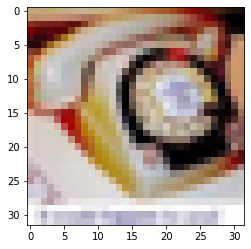

In [69]:
plt.imshow(xTrain[5])

In [73]:
1.000e+15

1000000000000000.0

In [74]:
np.NAN

nan